In [ ]:
import pandas as pd

In [ ]:
!pip install gliner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 70.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
df = pd.read_excel("Claims_LLMAnnotation.xlsx")

In [ ]:
from gliner import GLiNER
model = GLiNER.from_pretrained("urchade/gliner_large_bio-v0.1")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

gliner_config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/874M [00:00<?, ?B/s]

In [ ]:
labels = ["disease", "causative agent", "treatment", "body fluid", "lipid", "food"]

In [ ]:
df['entity_text_map'] = ''
df['entities'] = ''
df['entity_presence'] = [[0, 0, 0, 0, 0, 0] for _ in range(len(df))]
df['entity_count'] = [[0, 0, 0, 0, 0, 0] for _ in range(len(df))]
for index, row in df.iterrows():
    # Check if claim is a string
    claim = row['claim']
    if isinstance(claim, str):
        entities = model.predict_entities(claim, labels)
        # Initialize a string to hold your formatted entities for this claim
        formatted_entities = ""
        grouped_labels = ""
        for entity in entities:
            formatted_entities += f'{entity["text"]} => {entity["label"]}, '
            grouped_labels += f'{entity["label"]},'


        # Remove the trailing comma and space
        formatted_entities = formatted_entities.rstrip(', ')
        print(formatted_entities)
        df.at[index, 'entity_text_map'] = formatted_entities
        df.at[index, 'entities'] = grouped_labels
        for label in grouped_labels:
            if label in labels:
                label_index = labels.index(label)
                df.at[index, 'entity_presence'][label_index] = 1
                df.at[index, 'entity_count'][label_index] += 1


chocolate => food, acne => disease

Stress => causative agent, acne => disease
acne => disease
Varicose veins => disease

Varicose veins => disease
Varicose veins => disease, laser therapy => treatment
Varicose veins => disease, sclerotherapy => treatment
Varicose veins => disease, endovenous ablation therapy => treatment
Varicose veins => disease, radiofrequency ablation therapy => treatment

Tonsillitis => disease, bacterial infection => causative agent
Tonsillitis => disease, bacterial or viral infection => causative agent
Tonsillectomy => treatment, tonsillitis => disease
Tonsillectomy => treatment, tonsillitis => disease
Tonsillectomy => treatment
Tonsillectomy => treatment
Tonsillectomy => treatment, sore throats => disease, sore throats => disease
sore throats => disease





Tonsillitis => disease
Tonsillitis => disease, antibiotics => treatment










Tonsillectomy => treatment, tonsillitis => disease

Dementia => disease
dementia => disease


cold => disease, cold => disea

In [ ]:
for index, row in df.iterrows():
    entities = row['entities'].rstrip(',').split(',')
    count_array = row['entity_count']
    presence_array = row['entity_presence']

    for entity in entities:
        print(entity)
        if entity in labels:
            idx = labels.index(entity)
            count_array[idx] += 1
            presence_array[idx] = 1

    # Update DataFrame
    df.at[index, 'entity_count'] = count_array
    df.at[index, 'entity_presence'] = presence_array

food
disease

causative agent
disease
disease
disease

disease
disease
treatment
disease
treatment
disease
treatment
disease
treatment

disease
causative agent
disease
causative agent
treatment
disease
treatment
disease
treatment
treatment
treatment
disease
disease
disease





disease
disease
treatment










treatment
disease

disease
disease


disease
disease

disease

food
disease

treatment

disease
treatment
disease

disease
disease
disease
food
disease

disease
food
body fluid
disease
disease
disease


causative agent
treatment



disease
disease
treatment
disease
disease
disease
disease
disease
disease
disease
treatment
treatment
treatment
treatment
disease
disease
disease
disease
disease
disease
food
disease
disease
disease

body fluid
body fluid
body fluid
disease
body fluid




disease
lipid
lipid
lipid
disease
lipid
lipid
lipid


disease
disease
disease
disease

lipid
lipid
body fluid
lipid
lipid
lipid
body fluid
disease






body fluid
body fluid

body fluid

body flui

In [ ]:
df

,Unnamed: 0,folder,filename,claim,label,url,GOLD EXPLANATION,CATEGORY,gemini_label,gemini_explanation,gpt4_label,gpt4_rationale,entity_text_map,entities,entity_presence,entity_count
0,0.0,/content/drive/MyDrive/images/myths on urticaria,mythsonurticaria1.jpeg,Eating chocolate will cause acne.,SUPPORTED,https://www.jaad.org/article/S0190-9622(16)013...,The chocolate consumption group had a statisti...,Skin,REFUTED,There is no scientific evidence to support the...,REFUTED,A study published in the Journal of the Americ...,"chocolate => food, acne => disease","food,disease,","[1, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 1]"
1,1.0,/content/drive/MyDrive/images/myths on urticaria,mythsonurticaria1.jpeg,You can get a cold from being in the rain.,SUPPORTED,https://pubmed.ncbi.nlm.nih.gov/17705968/,Exposure to cold has often been associated wi...,General Health,REFUTED,"The common cold is caused by viruses, not by b...",REFUTED,Colds are caused by viruses not by exposure t...,,,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
2,2.0,/content/drive/MyDrive/images/myths on urticaria,mythsonurticaria1.jpeg,Stress can cause acne.,SUPPORTED,https://medicaljournalssweden.se/actadv/articl...,"Based on this study, increased stress does not...",Skin,SUPPORTED,There is evidence to suggest that stress can t...,SUPPORTED,Multiple scientific studies have established a...,"Stress => causative agent, acne => disease","causative agent,disease,","[1, 1, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0]"
3,3.0,/content/drive/MyDrive/images/myths on urticaria,mythsonurticaria1.jpeg,You can prevent acne by washing your face more...,NOT ENOUGH INFORMATION,https://www.tandfonline.com/doi/full/10.1080/0...,Washing and over-the-counter cleansers are com...,Skin,REFUTED,Washing your face more often does not prevent ...,REFUTED,Although washing your face can help remove exc...,acne => disease,"disease,","[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]"
4,4.0,/content/drive/MyDrive/images/myths on vascula...,mythsonvascularsurgery3.jpeg,Varicose veins are caused by standing too much.,SUPPORTED,https://www.sjweh.fi/article/562,"For men working mostly in a standing position,...",Vascular,NOT ENOUGH INFORMATION,While standing for long periods of time can co...,SUPPORTED,Varicose veins can indeed be caused by prolong...,Varicose veins => disease,"disease,","[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mental Health,NaN,NaN,NaN,NaN,,,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fitness,NaN,NaN,NaN,NaN,,,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fitness,NaN,NaN,NaN,NaN,,,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mental Health,NaN,NaN,NaN,NaN,,,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"


In [ ]:
df.to_excel("NER_Features.xlsx")

In [ ]:
from collections import Counter
import pandas as pd

# Assuming df is your DataFrame and 'entities' column exists
label_counts = Counter()

for entities in df['entity_text_map']:
    entity_label_pairs = entities.split(',')
    for pair in entity_label_pairs:
        # Split the pair and check if it successfully splits into two parts
        parts = pair.split(' => ')
        if len(parts) == 2:
            _, label = parts
            label_counts[label] += 1
# Convert to DataFrame for easy plotting
labels_df = pd.DataFrame(label_counts.items(), columns=['Label', 'Count'])

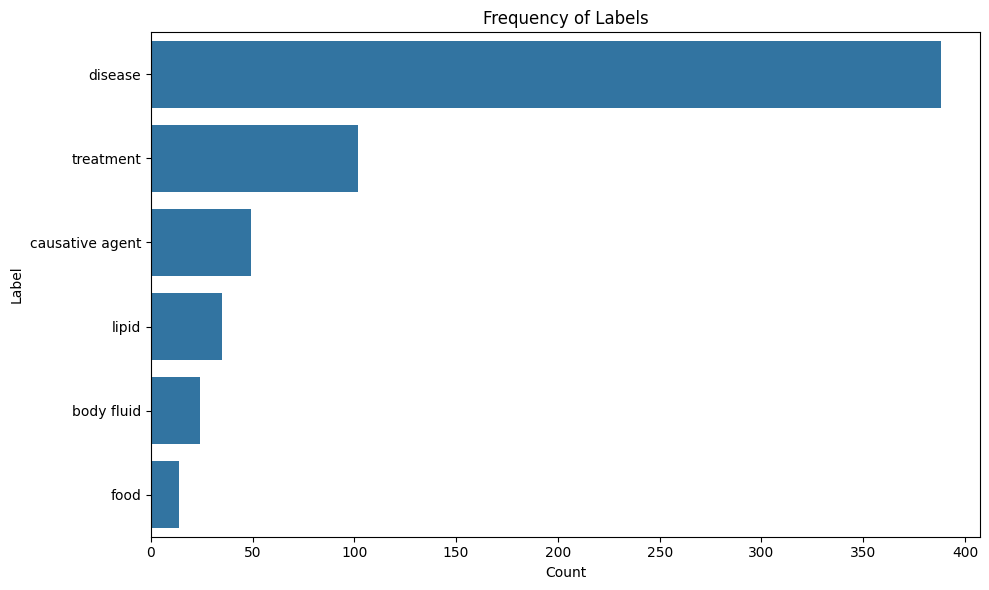

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame for better visualization
labels_df_sorted = labels_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=labels_df_sorted, x='Count', y='Label')
plt.title('Frequency of Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.tight_layout()
plt.show()


## Finding Co-occuring Entity Pairs

In [ ]:
entities_by_context = []

for entities in df['entity_text_map']:
    entity_label_pairs = entities.split(', ')
    context_entities = [pair.split(' => ')[1] for pair in entity_label_pairs if ' => ' in pair]
    entities_by_context.append(context_entities)

In [ ]:
from itertools import combinations
from collections import Counter

co_occurrences = Counter()

for context_entities in entities_by_context:
    # Generate all possible pairs of entities within the context
    for pair in combinations(context_entities, 2):
        # Sort the pair to ensure consistency (A, B) is treated the same as (B, A)
        sorted_pair = tuple(sorted(pair))
        co_occurrences[sorted_pair] += 1


In [ ]:
# Display the 10 most common co-occurring entity pairs
for pair, count in co_occurrences.most_common(10):
    print(f"Pair: {pair}, Count: {count}")

Pair: ('disease', 'treatment'), Count: 70
Pair: ('disease', 'disease'), Count: 63
Pair: ('causative agent', 'disease'), Count: 33
Pair: ('causative agent', 'causative agent'), Count: 22
Pair: ('treatment', 'treatment'), Count: 15
Pair: ('disease', 'lipid'), Count: 15
Pair: ('lipid', 'lipid'), Count: 15
Pair: ('disease', 'food'), Count: 9
Pair: ('body fluid', 'disease'), Count: 7
Pair: ('lipid', 'treatment'), Count: 4


In [ ]:
# Assuming co_occurrences is your Counter object with the co-occurrence counts
most_common_pairs = co_occurrences.most_common(10)

# Separate the entity pairs and their counts into two lists
pairs = [f"{pair[0]} & {pair[1]}" for pair, count in most_common_pairs]
counts = [count for pair, count in most_common_pairs]

<ipython-input-15-e57747f190c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=pairs, palette="viridis")


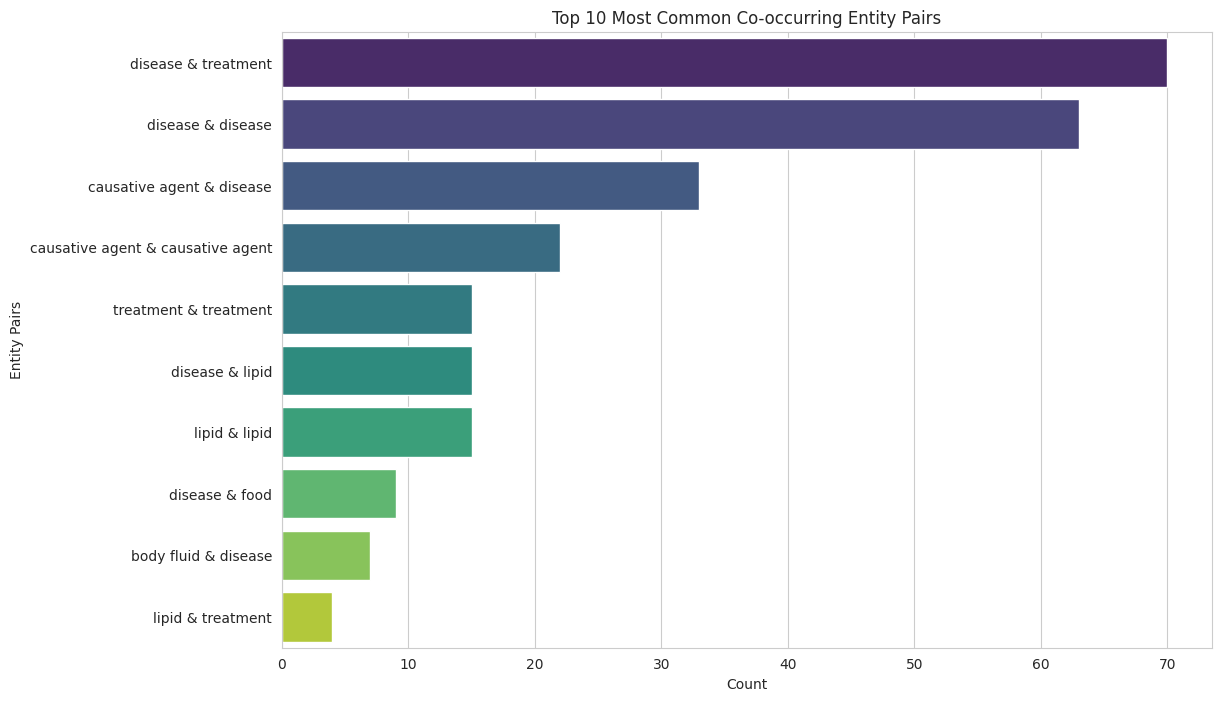

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=pairs, palette="viridis")

plt.title('Top 10 Most Common Co-occurring Entity Pairs')
plt.xlabel('Count')
plt.ylabel('Entity Pairs')

plt.show()